<a href="https://colab.research.google.com/github/kumoromilee/BasicProg_DataViz65/blob/main/DataViz65_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ข้อสอบจำนวน 1 ข้อ คะแนน 120 เต็ม 100 คะแนน 

จุดมุ่งหมาย: ตัดเกรดรายวิชา Project และวาดกราฟแสดงผลการสอบดังรายละเอียดต่อไปนี้


1. คะแนนประกอบด้วย 2 ส่วน

* คะแนน 40% จากอาจารย์ที่ปรึกษา  (จากไฟล์ คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx)

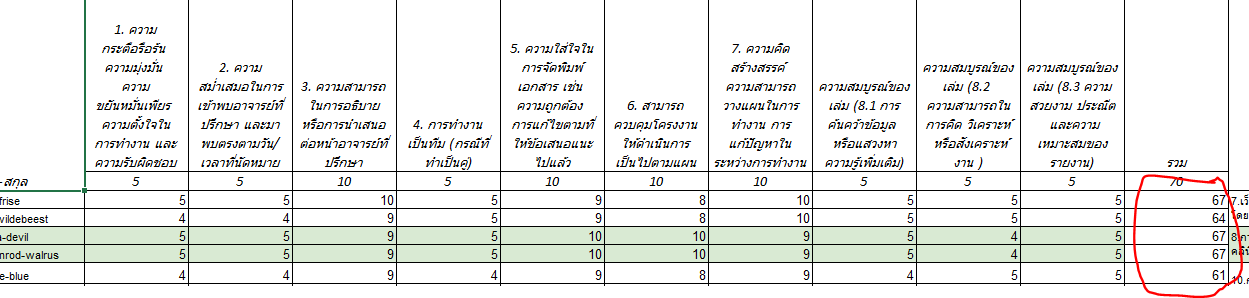

* คะแนน 60% จากกรรมการในห้องโดยมีการสอบทั้งหมดสามวันอยู่คนละ sheet (จากไฟล์ คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx) ***(คะแนนจากกรรมการในห้องจะประกอบไปด้วยคะแนนจากกรรมการ 2 ท่าน ท่านละ 30%)***

   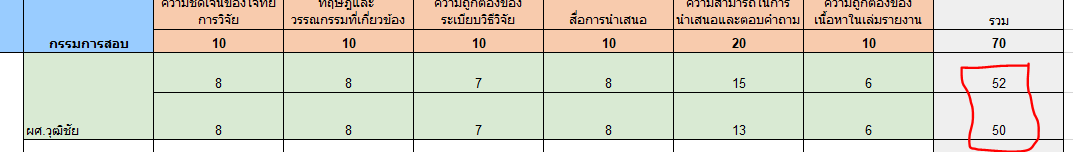

   ดาวน์โหลดไฟล์คะแนนทั้งหมดจาก https://drive.google.com/drive/folders/1YB4qdluEN8dCE7vhDrNOW40JoUDyeEyL?usp=sharing


2. รวมคะแนนและตัดเกรดแบบ อิงเกณฑ์ <50 ได้ F ... >= 80 ได้ A และ save ตาราง ชื่อ คะแนนรวมและเกรดที่ได้ของนักศึกษาแต่ละคน
***คะแนนรวม 60 คะแนน (ดึงข้อมูลและรวมข้อมูล 40 ตัดเกรด 20)***
3. วาดกราฟ 
* Stacked Barchart แสดงคะแนนรวมของนักศึกษาแต่ละคนโดยเรียงจากคะแนนรวมมากที่สุดไปน้อยที่สุด (คะแนนส่วนที่ปรึกษา ซ้อนกับ คะแนนสอบปากเปล่า) 
* Histogram แสดงจำนวนผู้ได้เกรดต่างๆ
* Boxplot เปรียบเทียบการกระจายของคะแนนที่อ.กรรมการสอบปากเปล่าแต่ละท่านให้นักศึกษา

***คะแนนรวม 60 คะแนน (ข้อละ 20 คะแนน)***


# ตัวอย่าง code บางส่วน ที่อาจจะมีประโยชน์กับการทำข้อสอบ

In [58]:
import pandas as pd

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
day0 = pd.read_excel('/content/drive/MyDrive/final /คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=0,skiprows=1)
day0.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,8,8,7,8,13,6,50
3,NaN,NaN,NaN,leaky-rust-chameleon,NaN,อ.ยุภาพร,9,8,8,9,18,8,60
4,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,9,8,8,9,16,8,58


In [61]:
day0_1 = day0.fillna(method='ffill')
day0_1.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,13,6,50
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,18,8,60
4,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,16,8,58


In [62]:
all_aj_list_1 = set(list(day0_1['กรรมการสอบ'].dropna()))
all_aj_list_1

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.วรรณพร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.วิชุดา',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

In [63]:
day1 = pd.read_excel('/content/drive/MyDrive/final /คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=1,skiprows=1)
day1.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63
2,NaN,NaN,NaN,skanky-burgundy-kingfisher,NaN,NaN,9.0,9,9.0,8.0,18.0,8.0,61
3,NaN,NaN,NaN,tasty-myrtle-ant,NaN,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60
4,NaN,NaN,NaN,skanky-burgundy-kingfisher,NaN,NaN,8.0,8,9.0,9.0,17.0,9.0,60


In [64]:
day0_2 = day1.fillna(method='ffill')
day0_2.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63
2,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,18.0,8.0,61
3,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60
4,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60


In [65]:
all_aj_list_2 = set(list(day0_2['กรรมการสอบ'].dropna()))
all_aj_list_2

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.ธิดาเดียว',
 'รศ.วิชุดา',
 'รศ.สุพรรณี',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

In [66]:
day2 = pd.read_excel('/content/drive/MyDrive/final /คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=2,skiprows=1)
day2.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10.0,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51
2,NaN,NaN,NaN,NaN,NaN,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45
3,NaN,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57
4,NaN,NaN,NaN,craggy-cream-paradise,NaN,NaN,9.0,8.0,8.0,8.0,16.0,8.0,57


In [67]:
day0_3 = day2.fillna(method='ffill')
day0_3.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10.0,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51
2,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45
3,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57
4,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,craggy-cream-paradise,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57


In [68]:
all_aj_list_3 = set(list(day0_3['กรรมการสอบ'].dropna()))
all_aj_list_3

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.วรรณพร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.ธิดาเดียว',
 'รศ.วิชุดา',
 'รศ.สุพรรณี',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

###คะแนนอาจารย์ที่ปรึกษา_renamed

In [69]:
advisor_tnp = pd.read_excel('/content/drive/MyDrive/final /คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.ธนพงศ์',skiprows=1)
advisor_tnp.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,jumpy-apricot-frise,5,5,10,5,9,8,10,5,5,5,67,7.เว็บแอปพลิเคชันสำหรับการสร้างแบบจำลอง 3 มิติ...
2,boozy-thistle-wildebeest,4,4,9,5,9,8,10,5,5,5,64,NaN
3,hasty-magnolia-devil,5,5,9,5,10,10,9,5,4,5,67,8.การออกแบบและพัฒนาแชทบอทสำหรับการเรียนการสอนโ...
4,chummy-goldenrod-walrus,5,5,9,5,10,10,9,5,4,5,67,NaN


In [70]:
tnp=advisor_tnp.iloc[1:]

In [71]:
advisor_tp = pd.read_excel('/content/drive/MyDrive/final /คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.ธิปไตย',skiprows=1)
advisor_tp.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,leaky-rust-chameleon,5,5,9,5,9,10,10,5,5,5,68,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...
2,greasy-ruby-bombay,4,5,7,5,8,10,9,4,5,4,61,NaN
3,wiggy-silver-drever,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...
4,stinky-red-chow,5,5,8,5,9,10,10,5,5,5,67,NaN


In [72]:
tp=advisor_tp.iloc[1:]

In [73]:
advisor_tdd = pd.read_excel('/content/drive/MyDrive/final /คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='รศ.ธิดาเดียว',skiprows=1)
advisor_tdd.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5.0,5.0,70,NaN
1,paltry-plum-saola,5,5,9,5,10,9,9,5,4.5,4.5,66,3.ตัวแบบทำนายการออกกำลังกายของประชากรอำเภอเมือ...
2,cloudy-wheat-bobcat,5,5,9,5,10,9,9,5,4.5,4.5,66,NaN
3,gloppy-persimmon-flamingo,5,5,9,5,9,9,9,5,4.5,4.5,65,4.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของบุค...
4,sleepy-gamboge-zebra,5,5,9,5,9,9,9,5,4.5,4.5,65,NaN


In [74]:
tdd=advisor_tdd.iloc[1:]

In [75]:
advisor_sk = pd.read_excel('/content/drive/MyDrive/final /คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ผศ.สุกัญญา',skiprows=1)
advisor_sk.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,whiny-pear-otter,5,5,8,5,9,10,8,5,4,4,63,6.ปัจจัยที่มีผลต่อความพึงพอใจในการใช้บริการรถต...
2,craggy-cream-reindeer,5,5,8,5,9,10,8,5,4,4,63,NaN
3,cloudy-myrtle-kudu,5,5,9,5,9,10,9,5,5,4,66,36.ทัศนคติของนักศึกษาที่มีต่อสถิติศาสตร์ในกลุ่...
4,lovely-asparagus-urchin,5,5,9,5,9,10,9,5,5,4,66,NaN


In [76]:
sk=advisor_sk.iloc[1:]

In [77]:
advisor_wtc = pd.read_excel('/content/drive/MyDrive/final /คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ผศ.วุฒิชัย',skiprows=1)
advisor_wtc.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5.0,10,10,10,5,5,5,70,NaN
1,lumpy-carmine-slug,5,5,10,NaN,10,10,10,5,5,5,70,9.ตัวแบบทำนายความรุนแรงของการบาดเจ็บทางการจราจ...
2,snappy-azure-balinese,5,5,9,5.0,9,9,9,5,4,5,65,18.การปกปิดข้อมูลโดยใช้หลักการวิเคราะห์องค์ประ...
3,pasty-bronze-booby,5,5,9,5.0,9,9,9,5,4,5,65,NaN
4,pokey-asparagus-frise,5,4,9,5.0,9,9,9,5,4,5,64,31.สถิติที่ใช้ในการตรวจจับค่านอกเกณฑ์ที่มีความ...


In [78]:
wtc=advisor_wtc.iloc[1:]

In [79]:
advisor_spn = pd.read_excel('//content/drive/MyDrive/final /คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='รศ.สุพรรณี',skiprows=1)
advisor_spn.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,70,NaN
1,chewy-persimmon-catfish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,11.ความคิดเห็นต่อปัจจัยที่มีผลในการตัดสินใจเลื...
2,skanky-amaranth-ostrich,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,NaN
3,greasy-eggplant-oyster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,12.การศึกษาความคิดเห็นที่มีต่อปัจจัยที่ส่งผลต่...
4,randy-mauve-ibis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NaN


In [80]:
spn=advisor_spn.iloc[1:]

In [81]:
advisor_ypp = pd.read_excel('/content/drive/MyDrive/final /คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='อ.ยุภาพร',skiprows=1)
advisor_ypp.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,nerdy-plum-abyssinian,5,5,10,5,10,10,9,4,4,5,67,14.ตัวแบบพยากรณ์จำนวนผู้ติดเชื้อไวรัสสะสม 6 อั...
2,gloppy-xanthic-retriever,5,5,10,5,10,10,9,4,4,5,67,NaN
3,cloudy-myrtle-whippet,5,5,10,5,10,10,9,4,4,5,67,39.ระบบสินค้าคงคลัง โดยใช้ทฤษฎีสินค้าคงคลัง กร...
4,cloudy-grey-walrus,5,5,10,5,10,10,9,4,4,5,67,NaN


In [82]:
ypp=advisor_ypp.iloc[1:]

In [83]:
advisor_prk = pd.read_excel('/content/drive/MyDrive/final /คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.พลากร',skiprows=1)
advisor_prk.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,craggy-mustard-sponge,4,4,8,5,7,8,7,4,4,4,55,22.การเปรียบเทียบวิธีการคัดเลือกตัวแปรอิสระในต...
2,fuzzy-silver-discus,4,4,8,5,7,8,7,4,4,4,55,NaN
3,lousy-corn-mule,5,5,9,5,9,8,8,5,5,5,64,41.ตัวแบบการพยากรณ์ปริมาณการส่งออกข้าวรายเดือน...
4,muggy-charcoal-akita,5,5,9,5,9,8,8,5,5,5,64,NaN


In [84]:
prk=advisor_prk.iloc[1:]

In [85]:
advisor_wcd = pd.read_excel('/content/drive/MyDrive/final /คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='รศ.วิชุดา',skiprows=1)
advisor_wcd.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5.0,5.0,10.0,5,10,10.0,10,5.0,5,5.0,70.0,NaN
1,tasty-myrtle-ant,5.0,5.0,8.0,5,8,7.0,8,5.0,5,5.0,61.0,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...
2,skanky-burgundy-kingfisher,5.0,5.0,8.0,5,8,7.0,8,5.0,5,5.0,61.0,NaN
3,sleazy-mauve-akita,5.0,5.0,7.0,5,8,8.0,8,5.0,5,5.0,61.0,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...
4,crappy-burgundy-quoll,5.0,5.0,8.0,5,8,8.0,8,5.0,5,5.0,62.0,NaN


In [86]:
wcd=advisor_wcd.iloc[1:]

In [87]:
advisor_wnp = pd.read_excel('/content/drive/MyDrive/final /คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.วรรณพร',skiprows=1)
advisor_wnp.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70.0,NaN
1,skinny-bronze-dormouse,5,5,8,5,8,9,10,5,4,5,64.0,17.การวิเคราะห์การจัดกลุ่มพฤติกรรมการเรียนออนไ...
2,freaky-lemon-peccary,5,5,7,5,8,9,9,5,4,5,62.0,NaN
3,flabby-green-fish,5,5,8,5,9,9,10,5,5,5,66.0,19.ปัจจัยที่ส่งพลต่อพฤติกรรมการป้องกันตนเองจาก...
4,skinny-heliotrope-kudu,5,5,10,5,9,9,10,5,5,5,68.0,NaN


In [88]:
wnp=advisor_wnp.iloc[1:]

In [89]:
advisor_typ = pd.read_excel('/content/drive/MyDrive/final /คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='อ.ธรรณญพร',skiprows=1)
advisor_typ.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,chewy-lilac-shark,5,5,8,5,9,9,8,4,4,4,61,26.ปัจจัยที่มีอิทธิพลต่อความพึงพอใจของลูกค้าแล...
2,greasy-olivine-neanderthal,4,5,8,5,9,9,8,4,4,4,60,NaN
3,hasty-dandelion-grasshopper,5,5,8,5,9,9,9,4,4,4,62,27.ปัจจัยที่ส่งผลต่อการใช้แอปพลิเคชัน SCB EASY...
4,ugly-myrtle-walrus,5,5,8,5,9,9,9,4,4,4,62,NaN


In [90]:
typ=advisor_typ.iloc[1:]

In [91]:
advisor_atp = pd.read_excel('/content/drive/MyDrive/final /คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.อุทุมพร',skiprows=1)
advisor_atp.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,chummy-azure-walrus,5,5,9,5,10,10,10,4,5,5,68,33.การพัฒนาสมการประมาณน้ำหนักของผู้ป่วยจากการว...
2,breezy-pear-macaw,5,5,10,5,10,10,10,4,5,5,69,NaN
3,cozy-tangerine-ladybird,4,5,8,5,9,9,9,4,4,5,62,34.ปัจจัยเสี่ยงสำหรับผู้ป่วยไตวายเฉียบพลันที่ไ...
4,scaly-pumpkin-monkey,4,5,8,5,9,9,9,4,4,5,62,NaN


In [92]:
atp=advisor_atp.iloc[1:]

In [93]:
score=pd.concat([tnp,tp,atp,typ,wnp,wcd,prk,ypp,spn,wtc,sk,tdd])
score

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
1,jumpy-apricot-frise,5.0,5.0,10.0,5,9.0,8.0,10.0,5.0,5.0,5.0,67.0,7.เว็บแอปพลิเคชันสำหรับการสร้างแบบจำลอง 3 มิติ...
2,boozy-thistle-wildebeest,4.0,4.0,9.0,5,9.0,8.0,10.0,5.0,5.0,5.0,64.0,NaN
3,hasty-magnolia-devil,5.0,5.0,9.0,5,10.0,10.0,9.0,5.0,4.0,5.0,67.0,8.การออกแบบและพัฒนาแชทบอทสำหรับการเรียนการสอนโ...
4,chummy-goldenrod-walrus,5.0,5.0,9.0,5,10.0,10.0,9.0,5.0,4.0,5.0,67.0,NaN
5,randy-gamboge-blue,4.0,4.0,9.0,4,9.0,8.0,9.0,4.0,5.0,5.0,61.0,10.การพัฒนาชุดข้อมูลและตัวแบบสำหรับฝึกตัวแบบระ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,cloudy-wheat-bobcat,5.0,5.0,9.0,5,10.0,9.0,9.0,5.0,4.5,4.5,66.0,NaN
3,gloppy-persimmon-flamingo,5.0,5.0,9.0,5,9.0,9.0,9.0,5.0,4.5,4.5,65.0,4.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของบุค...
4,sleepy-gamboge-zebra,5.0,5.0,9.0,5,9.0,9.0,9.0,5.0,4.5,4.5,65.0,NaN
5,sickly-grey-dugong,5.0,5.0,9.0,5,9.0,9.0,9.0,5.0,4.5,4.5,65.0,5.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของนัก...


In [94]:
score40=score.rename(columns={'Unnamed: 0':'นักศึกษา','รวม':'รวม40%'})
score40

,นักศึกษา,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม40%,Unnamed: 12
1,jumpy-apricot-frise,5.0,5.0,10.0,5,9.0,8.0,10.0,5.0,5.0,5.0,67.0,7.เว็บแอปพลิเคชันสำหรับการสร้างแบบจำลอง 3 มิติ...
2,boozy-thistle-wildebeest,4.0,4.0,9.0,5,9.0,8.0,10.0,5.0,5.0,5.0,64.0,NaN
3,hasty-magnolia-devil,5.0,5.0,9.0,5,10.0,10.0,9.0,5.0,4.0,5.0,67.0,8.การออกแบบและพัฒนาแชทบอทสำหรับการเรียนการสอนโ...
4,chummy-goldenrod-walrus,5.0,5.0,9.0,5,10.0,10.0,9.0,5.0,4.0,5.0,67.0,NaN
5,randy-gamboge-blue,4.0,4.0,9.0,4,9.0,8.0,9.0,4.0,5.0,5.0,61.0,10.การพัฒนาชุดข้อมูลและตัวแบบสำหรับฝึกตัวแบบระ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,cloudy-wheat-bobcat,5.0,5.0,9.0,5,10.0,9.0,9.0,5.0,4.5,4.5,66.0,NaN
3,gloppy-persimmon-flamingo,5.0,5.0,9.0,5,9.0,9.0,9.0,5.0,4.5,4.5,65.0,4.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของบุค...
4,sleepy-gamboge-zebra,5.0,5.0,9.0,5,9.0,9.0,9.0,5.0,4.5,4.5,65.0,NaN
5,sickly-grey-dugong,5.0,5.0,9.0,5,9.0,9.0,9.0,5.0,4.5,4.5,65.0,5.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของนัก...


In [95]:
score40['รวม40%']=(score40['รวม40%']*40/70)


In [96]:
score40_1=score40[['นักศึกษา','รวม40%']]
score40_1

,นักศึกษา,รวม40%
1,jumpy-apricot-frise,38.285714
2,boozy-thistle-wildebeest,36.571429
3,hasty-magnolia-devil,38.285714
4,chummy-goldenrod-walrus,38.285714
5,randy-gamboge-blue,34.857143
...,...,...
2,cloudy-wheat-bobcat,37.714286
3,gloppy-persimmon-flamingo,37.142857
4,sleepy-gamboge-zebra,37.142857
5,sickly-grey-dugong,37.142857


###คะแนนสอบปากเปล่าของกรรมการสอบ_renamed

In [97]:
day0_1 = day0.fillna(method='ffill')
day_1=day0_1.iloc[1:]
day_1.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,13,6,50
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,18,8,60
4,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,16,8,58
5,SC 6501,10:00 – 12.00 น.,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,wiggy-silver-drever,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,14,7,52


In [98]:
day0_2 = day1.fillna(method='ffill')
day_2=day0_2.iloc[1:]
day_2.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63
2,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,18.0,8.0,61
3,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60
4,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60
5,SC 6501,10:00 – 12.00 น.,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...,sleazy-mauve-akita,รศ.วิชุดา,ดร.ธนพงศ์,8.0,9,9.0,8.0,17.0,7.0,58


In [99]:
day0_3 = day2.fillna(method='ffill')
day_3=day0_3.iloc[1:]
day_3.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51
2,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45
3,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57
4,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,craggy-cream-paradise,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57
5,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,อ.ยุภาพร,9.0,8.0,9.0,8.0,17.0,8.0,59


In [100]:
score60=pd.concat([day_1,day_2,day_3])
score60[['นักศึกษา','รวม']]

,นักศึกษา,รวม
1,leaky-rust-chameleon,52
2,greasy-ruby-bombay,50
3,leaky-rust-chameleon,60
4,greasy-ruby-bombay,58
5,wiggy-silver-drever,52
...,...,...
50,muggy-charcoal-akita,52
51,stinky-wisteria-nightingale,57
52,hazy-aqua-peccary,57
53,stinky-wisteria-nightingale,59


In [101]:
score60=score60.rename(columns={'รวม':'รวม60%'})

In [102]:
score60['รวม60%']=(score60['รวม60%']*60/70)
score60_1=score60[['นักศึกษา','รวม60%']]
score60_1

,นักศึกษา,รวม60%
1,leaky-rust-chameleon,44.571429
2,greasy-ruby-bombay,42.857143
3,leaky-rust-chameleon,51.428571
4,greasy-ruby-bombay,49.714286
5,wiggy-silver-drever,44.571429
...,...,...
50,muggy-charcoal-akita,44.571429
51,stinky-wisteria-nightingale,48.857143
52,hazy-aqua-peccary,48.857143
53,stinky-wisteria-nightingale,50.571429


In [103]:
score_total = score40_1.merge(score60_1, how ='left', left_on='นักศึกษา',right_on='นักศึกษา') 
score_total

,นักศึกษา,รวม40%,รวม60%
0,jumpy-apricot-frise,38.285714,48.857143
1,jumpy-apricot-frise,38.285714,51.428571
2,boozy-thistle-wildebeest,36.571429,48.857143
3,boozy-thistle-wildebeest,36.571429,49.714286
4,hasty-magnolia-devil,38.285714,43.714286
...,...,...,...
155,sleepy-gamboge-zebra,37.142857,46.285714
156,sickly-grey-dugong,37.142857,41.142857
157,sickly-grey-dugong,37.142857,45.428571
158,slaphappy-silver-monkey,37.142857,41.142857


In [104]:
score_total['คะแนนรวม'] = (score_total['รวม40%']+score_total['รวม60%'])
score_total

,นักศึกษา,รวม40%,รวม60%,คะแนนรวม
0,jumpy-apricot-frise,38.285714,48.857143,87.142857
1,jumpy-apricot-frise,38.285714,51.428571,89.714286
2,boozy-thistle-wildebeest,36.571429,48.857143,85.428571
3,boozy-thistle-wildebeest,36.571429,49.714286,86.285714
4,hasty-magnolia-devil,38.285714,43.714286,82.000000
...,...,...,...,...
155,sleepy-gamboge-zebra,37.142857,46.285714,83.428571
156,sickly-grey-dugong,37.142857,41.142857,78.285714
157,sickly-grey-dugong,37.142857,45.428571,82.571429
158,slaphappy-silver-monkey,37.142857,41.142857,78.285714


###Grading


In [105]:
score_total['คะแนนรวม'] = (score_total['รวม40%']+score_total['รวม60%'])
score_total

,นักศึกษา,รวม40%,รวม60%,คะแนนรวม
0,jumpy-apricot-frise,38.285714,48.857143,87.142857
1,jumpy-apricot-frise,38.285714,51.428571,89.714286
2,boozy-thistle-wildebeest,36.571429,48.857143,85.428571
3,boozy-thistle-wildebeest,36.571429,49.714286,86.285714
4,hasty-magnolia-devil,38.285714,43.714286,82.000000
...,...,...,...,...
155,sleepy-gamboge-zebra,37.142857,46.285714,83.428571
156,sickly-grey-dugong,37.142857,41.142857,78.285714
157,sickly-grey-dugong,37.142857,45.428571,82.571429
158,slaphappy-silver-monkey,37.142857,41.142857,78.285714


In [106]:
import numpy as np

In [107]:
score_total['Grade'] = np.where((score_total.คะแนนรวม < 50 ), 
                  'F', np.where((score_total.คะแนนรวม >= 50) & (score_total.คะแนนรวม < 55), 
                  'D', np.where((score_total.คะแนนรวม >= 55) & (score_total.คะแนนรวม < 60), 
                  'D+', np.where((score_total.คะแนนรวม >= 60) & (score_total.คะแนนรวม < 65), 
                  'C', np.where((score_total.คะแนนรวม >= 65) & (score_total.คะแนนรวม < 70), 
                  'C+', np.where((score_total.คะแนนรวม >= 70) & (score_total.คะแนนรวม < 75), 
                  'B', np.where((score_total.คะแนนรวม >= 75) & (score_total.คะแนนรวม < 80), 
                  'B+', np.where((score_total.คะแนนรวม >= 80) & (score_total.คะแนนรวม <= 100), 
                  'A', 'No Marks'))))))))
score_total.head()

,นักศึกษา,รวม40%,รวม60%,คะแนนรวม,Grade
0,jumpy-apricot-frise,38.285714,48.857143,87.142857,A
1,jumpy-apricot-frise,38.285714,51.428571,89.714286,A
2,boozy-thistle-wildebeest,36.571429,48.857143,85.428571,A
3,boozy-thistle-wildebeest,36.571429,49.714286,86.285714,A
4,hasty-magnolia-devil,38.285714,43.714286,82.000000,A


###วาดกราฟ

-Stacked Barchart แสดงคะแนนรวมของนักศึกษาแต่ละคนโดยเรียงจากคะแนนรวมมากที่สุดไปน้อยที่สุด (คะแนนส่วนที่ปรึกษา ซ้อนกับ คะแนนสอบปากเปล่า)

In [108]:
import matplotlib

In [109]:
from matplotlib import pyplot as plt

In [110]:
score_total.sort_values(by='คะแนนรวม', ascending=False)

,นักศึกษา,รวม40%,รวม60%,คะแนนรวม,Grade
13,skimpy-magenta-bombay,40.000000,54.857143,94.857143,A
65,skinny-heliotrope-kudu,38.857143,54.000000,92.857143,A
64,skinny-heliotrope-kudu,38.857143,53.142857,92.000000,A
126,lumpy-carmine-slug,40.000000,51.428571,91.428571,A
127,lumpy-carmine-slug,40.000000,51.428571,91.428571,A
...,...,...,...,...,...
119,hazy-beige-stoat,28.571429,36.000000,64.571429,C
121,squirrely-seashell-kingfisher,28.571429,36.000000,64.571429,C
81,frumpy-gamboge-emu,25.846154,38.571429,64.417582,C
57,skanky-copper-affenpinscher,31.428571,0.000000,31.428571,F


In [111]:
sort_by_scoretotal=score_total.rename(columns={'รวม40%':'The score of the oral examination','รวม60%':'Advisor score','คะแนนรวม':'total_score'})
sort_by_scoretotal

,นักศึกษา,The score of the oral examination,Advisor score,total_score,Grade
0,jumpy-apricot-frise,38.285714,48.857143,87.142857,A
1,jumpy-apricot-frise,38.285714,51.428571,89.714286,A
2,boozy-thistle-wildebeest,36.571429,48.857143,85.428571,A
3,boozy-thistle-wildebeest,36.571429,49.714286,86.285714,A
4,hasty-magnolia-devil,38.285714,43.714286,82.000000,A
...,...,...,...,...,...
155,sleepy-gamboge-zebra,37.142857,46.285714,83.428571,A
156,sickly-grey-dugong,37.142857,41.142857,78.285714,B+
157,sickly-grey-dugong,37.142857,45.428571,82.571429,A
158,slaphappy-silver-monkey,37.142857,41.142857,78.285714,B+


In [112]:
sortscore = sort_by_scoretotal.sort_values(by='total_score', ascending=False)
sortscore

,นักศึกษา,The score of the oral examination,Advisor score,total_score,Grade
13,skimpy-magenta-bombay,40.000000,54.857143,94.857143,A
65,skinny-heliotrope-kudu,38.857143,54.000000,92.857143,A
64,skinny-heliotrope-kudu,38.857143,53.142857,92.000000,A
126,lumpy-carmine-slug,40.000000,51.428571,91.428571,A
127,lumpy-carmine-slug,40.000000,51.428571,91.428571,A
...,...,...,...,...,...
119,hazy-beige-stoat,28.571429,36.000000,64.571429,C
121,squirrely-seashell-kingfisher,28.571429,36.000000,64.571429,C
81,frumpy-gamboge-emu,25.846154,38.571429,64.417582,C
57,skanky-copper-affenpinscher,31.428571,0.000000,31.428571,F


In [113]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[20,20]

In [114]:
X=sortscore['The score of the oral examination']
Y=sortscore['Advisor score']
Z=sortscore['นักศึกษา']

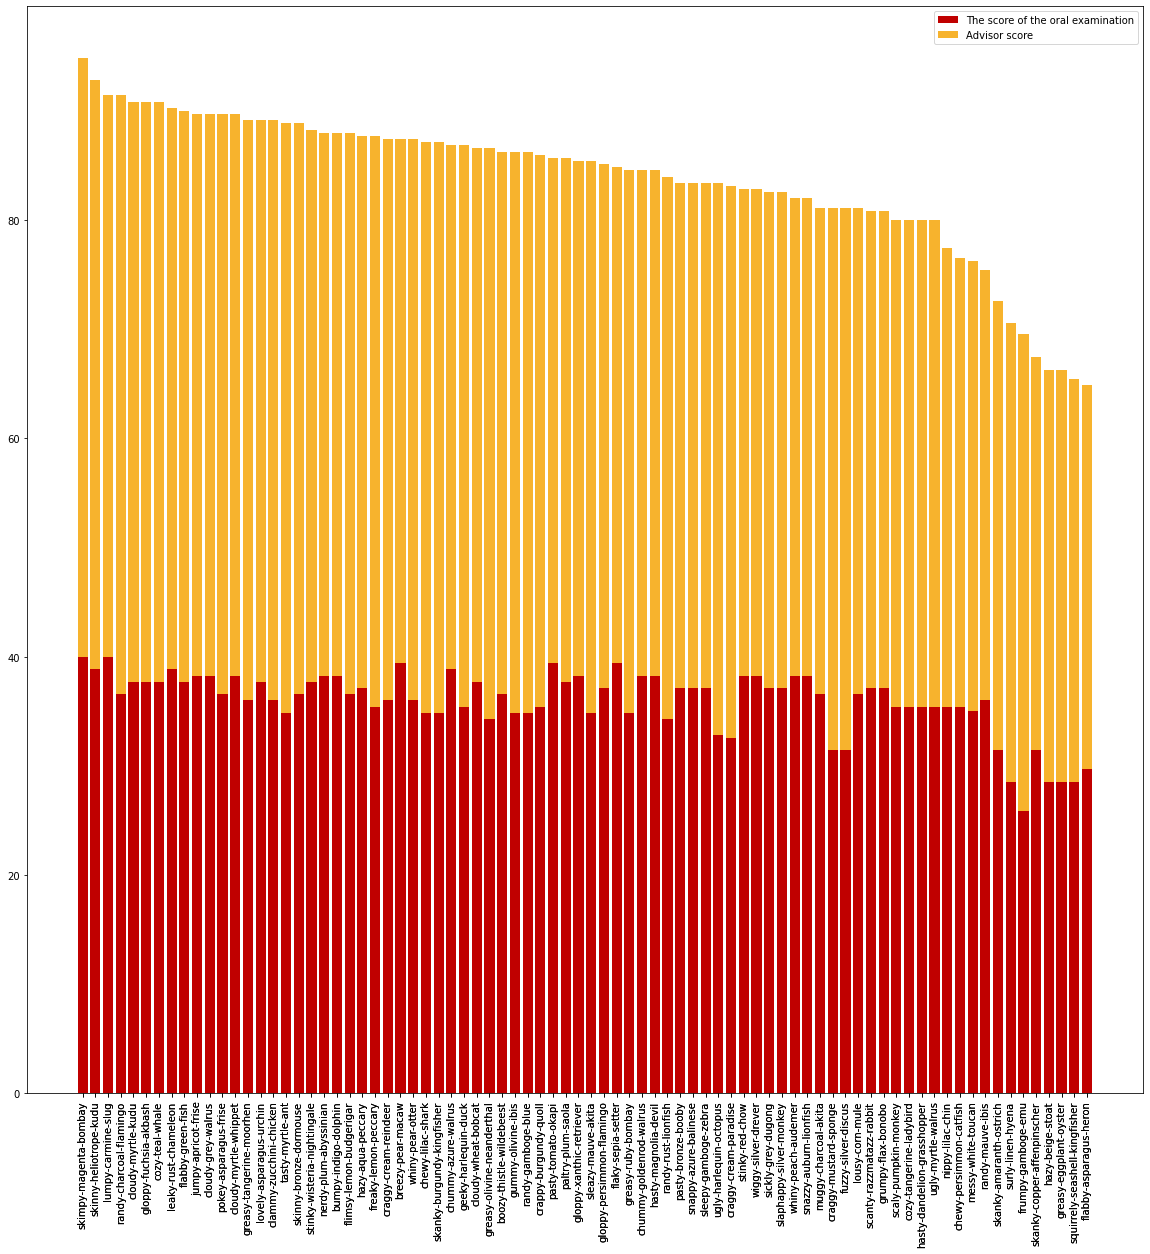

In [115]:
plt.bar(Z, X, label ='The score of the oral examination',color=['#C00000'])
plt.bar(Z,Y , bottom=X, label ='Advisor score',color=['#F7B32D'])
plt.xticks(sortscore.reset_index()['นักศึกษา'],rotation=90)
plt.legend();

-Histogram แสดงจำนวนผู้ได้เกรดต่างๆ

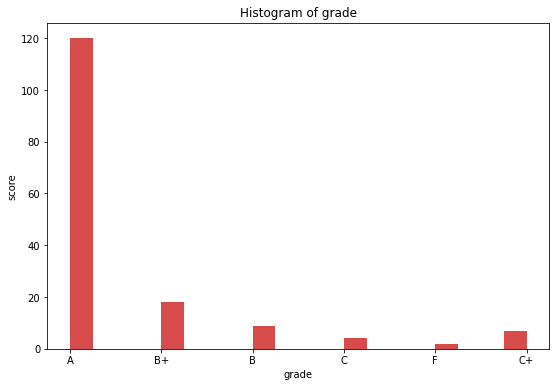

In [116]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[9,6]
plt.hist(sort_by_scoretotal['Grade'],bins=20,color='#D74B4B')
plt.title('Histogram of grade')
plt.xlabel('grade')
plt.ylabel('score');

Boxplot เปรียบเทียบการกระจายของคะแนนที่อ.กรรมการสอบปากเปล่าแต่ละท่านให้นักศึกษา

In [117]:
matplotlib.rcParams['figure.figsize']=[20,20]

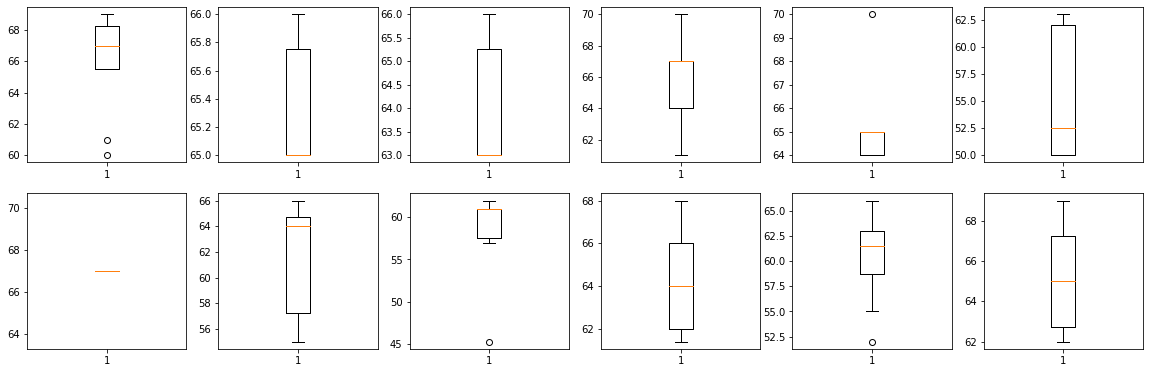

In [118]:
plt.subplot(6,6,1)
PA01 = plt.boxplot(tp['รวม'])
plt.subplot(6,6,2)
PA02 = plt.boxplot(tdd['รวม'])
plt.subplot(6,6,3)
PA03 = plt.boxplot(sk['รวม'])
plt.subplot(6,6,4)
PA04 = plt.boxplot(tnp['รวม'])
plt.subplot(6,6,5)
PA05 = plt.boxplot(wtc['รวม'])
plt.subplot(6,6,6)
PA06 = plt.boxplot(spn['รวม'])
plt.subplot(6,6,7)
PA07 = plt.boxplot(ypp['รวม'])
plt.subplot(6,6,8)
PA08 = plt.boxplot(prk['รวม'])
plt.subplot(6,6,9)
PA09 = plt.boxplot(wcd['รวม'])
plt.subplot(6,6,10)
PA10 = plt.boxplot(wnp['รวม'])
plt.subplot(6,6,11)
PA11 = plt.boxplot(typ['รวม'])
plt.subplot(6,6,12)
PA12 = plt.boxplot(atp['รวม'])

สมาชิกกลุ่ม

633020438-6 นางสาวกาญจนสุดา ผุยมูลตรี

633020548-9 นางสาวกัลยรัตน์ บุญกอง

633021020-6 นายพิทวัส พิมพ์บุสิทธิ์